## Imports

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from keras.layers import Dense, Input
from keras import Model

## Load MNIST-dataset

In [2]:
(X_train, y_train), (X_test, y_test) = keras.datasets.mnist.load_data()

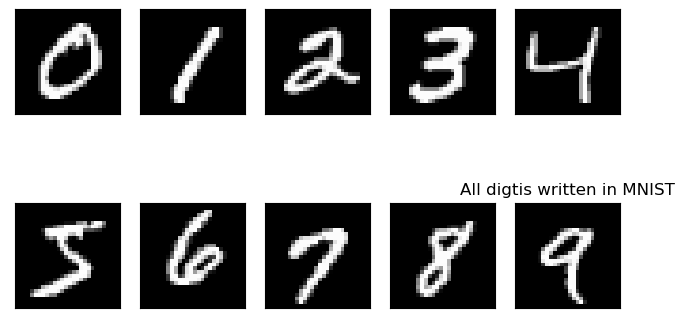

In [3]:
fig, ax = plt.subplots(nrows=2, ncols=5, sharex=True, sharey=True)
ax = ax.flatten()
for i in range(10):
    img = X_train[y_train == i][0].reshape(28, 28)
    ax[i].imshow(img, cmap="gray")
ax[0].set_xticks([])
ax[0].set_yticks([])
plt.tight_layout()
plt.title("All digtis written in MNIST")
plt.show()

## Normalize images.

In [4]:
X_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

In [5]:
X_train[0].shape

(28, 28)

In [6]:
from sklearn.preprocessing import MinMaxScaler

In [7]:
scaler = MinMaxScaler()
scaled_train = scaler.fit_transform(X_train[0])
scaled_train.min(), scaled_train.max()

(0.0, 1.0)

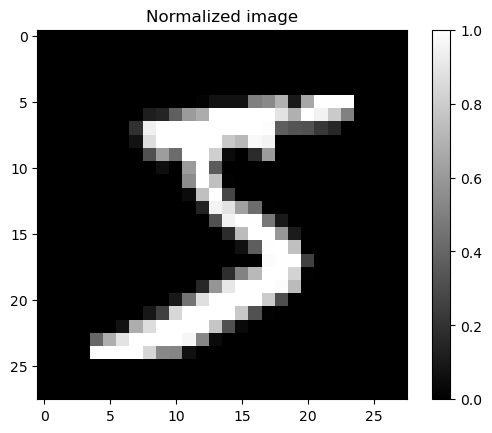

In [8]:
plt.imshow(scaled_train, cmap="gray")
plt.title("Normalized image")
plt.colorbar()
plt.show()

In [9]:
type(X_train)

numpy.ndarray

In [10]:
X_train = np.array([scaler.fit_transform(X) for X in X_train])
X_train

array([[[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       ...,

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0.

In [11]:
X_test = np.array([scaler.fit_transform(X) for X in X_test])

## Add a model

In [12]:
class AutoEncoder(Model):
    def __init__(self):
        super().__init__()
        
        input_layer = Input(shape=(28, 28, 1), name="img")
        x = keras.layers.Flatten()(input_layer)
        x = Dense(64, activation="relu")(x)
        x = Dense(32, activation="relu")(x)
        self.encoder = Model(input_layer, x)
        
        decoder_input = Dense(64, activation="relu")(x)
        decoder_output = Dense(784, activation="relu")(decoder_input)
        decoder_output = keras.layers.Reshape((28, 28, 1))(decoder_output)
        
        opt = keras.optimizers.Adam()
        self.autoencoder = Model(input_layer, decoder_output, name="autoencoder")
        self.autoencoder.summary()
        self.autoencoder.compile(opt, loss="mse")
    
    def fit(self, X, epochs, batch_size=32, validation_split=0.2):
        self.autoencoder.fit(X, X, epochs=epochs, batch_size=batch_size, validation_split=validation_split)
    
    def encoder_predict(self, X):
        return self.encoder.predict(X)
    
    def predict(self, X):
        return self.autoencoder.predict(X)
        

In [13]:
autoencoder = AutoEncoder()

Model: "autoencoder"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 img (InputLayer)            [(None, 28, 28, 1)]       0         
                                                                 
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 64)                50240     
                                                                 
 dense_1 (Dense)             (None, 32)                2080      
                                                                 
 dense_2 (Dense)             (None, 64)                2112      
                                                                 
 dense_3 (Dense)             (None, 784)               50960     
                                                                 
 reshape (Reshape)           (None, 28, 28, 1)         

In [14]:
autoencoder.fit(X_train, 3)

Epoch 1/3
1500/1500 [==============================] - 7s 4ms/step - loss: 0.0316 - val_loss: 0.0245
Epoch 2/3
1500/1500 [==============================] - 6s 4ms/step - loss: 0.0238 - val_loss: 0.0230
Epoch 3/3
1500/1500 [==============================] - 6s 4ms/step - loss: 0.0225 - val_loss: 0.0219


## Show results

In [15]:
example = autoencoder.encoder_predict(X_test[0].reshape(-1, 28, 28, 1))[0]
example.shape

1/1 [==============================] - 0s 96ms/step


(32,)

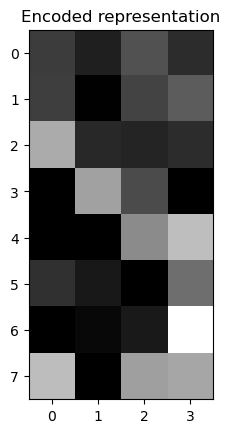

In [16]:
plt.imshow(example.reshape(8, 4), cmap="gray")
plt.title("Encoded representation")
plt.show()

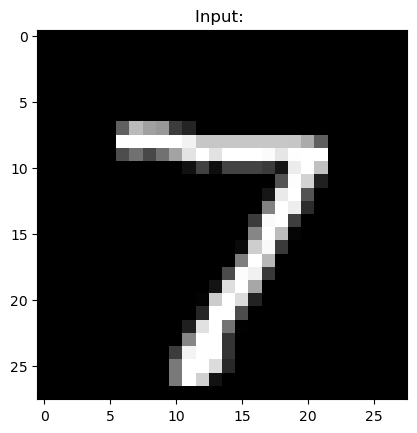

In [17]:
plt.imshow(X_test[0], cmap="gray")
plt.title("Input: ")
plt.show()

In [18]:
prediction = autoencoder.predict(X_test[0].reshape(-1, 28, 28, 1))[0]
prediction.shape

1/1 [==============================] - 0s 79ms/step


(28, 28, 1)

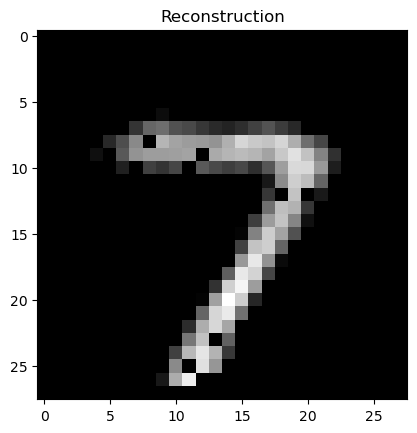

In [19]:
plt.imshow(prediction, cmap="gray")
plt.title("Reconstruction")
plt.show()

### Compare all digts

1/1 [==============================] - 0s 23ms/step


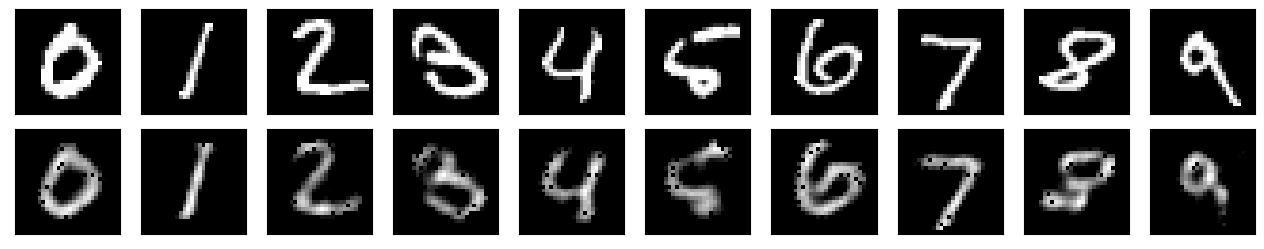

In [20]:
fig, ax = plt.subplots(nrows=2, ncols=10, sharex=True, sharey=True, figsize=(16, 8))
for i in range(10):
    img = X_test[y_test == i][0].reshape(28, 28)
    reconstruction = autoencoder.predict(X_test[y_test == i][0].reshape(-1, 28, 28, 1))[0]
    ax[0][i].imshow(img, cmap="gray")
    ax[1][i].imshow(reconstruction, cmap="gray")
ax[0][0].set_xticks([])
ax[1][0].set_yticks([])
plt.subplots_adjust(bottom=0.4, top=0.7, hspace=0)
plt.show()